In [5]:
import bplot as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
% matplotlib inline

In [22]:
mlb = pd.read_csv('https://roualdes.us/data/mlb.csv')

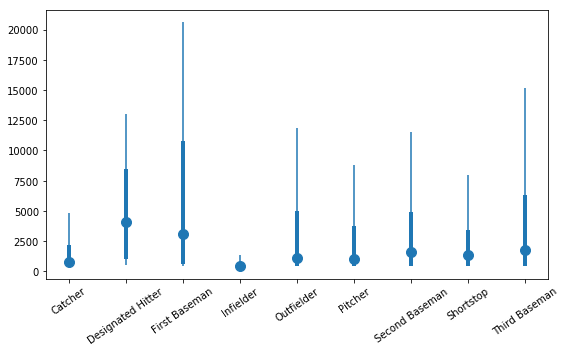

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
xlabs = []
for idx, (name, grp) in enumerate(mlb.groupby('position')):
    bp.box(idx, grp['salary'])
    xlabs.append(name)
plt.xticks(np.arange(idx+1), xlabs, rotation=35)
plt.tight_layout()

In [7]:
model = ols('salary ~ C(position)', data=mlb).fit()
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,2.514391e+08,1.0,12.967129,0.000336
C(position),6.097532e+08,8.0,3.930746,0.000142
Residual,1.588082e+10,819.0,NaN,NaN


In [23]:
carnivora = pd.read_csv('https://roualdes.us/data/carnivora.csv')
carnivs_idx = carnivora['Family'].isin(['Ailuridae', 'Procyonidae', 'Viverridae'])
carnivs = carnivora[~carnivs_idx]

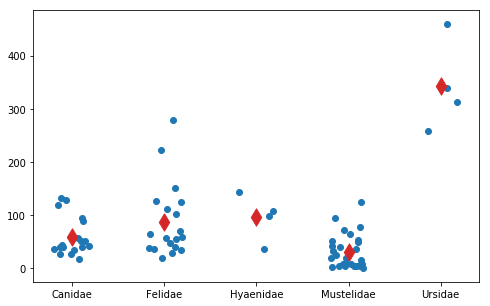

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
xticklabs = []; xticks = []
for idx, (name, grp) in enumerate(carnivs.groupby('Family')):
    y = grp['SB']
    x = np.repeat(idx, y.shape[0])
    bp.jitter(x, y)
    xticklabs.append(name)
    xticks.append(idx)
ax = plt.xticks(xticks, xticklabs)
bp.point(np.array(xticks), 
         carnivs.groupby('Family')['SB'].agg({'mean'})['mean'].values,
        color='tab:red', size=150, shape='d')

In [13]:
model = ols('SB ~ C(Family)', data=carnivs).fit()
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,63629.335556,1.0,26.766134,2.091425e-06
C(Family),354999.208772,4.0,37.333237,1.083349e-16
Residual,166406.307694,70.0,NaN,NaN


In [15]:
# coefficients
model.params

Intercept                   59.455556
C(Family)[T.Felidae]        28.144444
C(Family)[T.Hyaenidae]      36.444444
C(Family)[T.Mustelidae]    -29.470556
C(Family)[T.Ursidae]       282.869444
dtype: float64

In [13]:
carnivs.groupby('Family')['SB'].agg({'mean'})

,mean
Family,
Canidae,59.455556
Felidae,87.600000
Hyaenidae,95.900000
Mustelidae,29.985000
Ursidae,342.325000


In [20]:
# fitted values
model.fittedvalues

0       72.844444
1       28.844444
2       -7.655556
3       -2.655556
4       69.544444
5       35.544444
6      -23.955556
7      -15.955556
8      -33.655556
9      -25.955556
10     -42.155556
11     -32.655556
12     -18.655556
13      -7.955556
14     -19.455556
15     -17.655556
16      60.544444
17     -18.955556
18      -4.025000
19     -83.325000
20     117.175000
21     -29.825000
27     -25.985000
28     -27.985000
29     -28.985000
30     -25.985000
31     -25.485000
32     -23.235000
33     -21.485000
34     -21.485000
          ...    
50     -24.985000
51      12.015000
52      22.815000
53      10.015000
54      35.015000
55      65.015000
56      95.515000
89       1.900000
90      11.100000
91      47.600000
92     -60.600000
93     -50.100000
94     -51.300000
95     -48.300000
96     -30.800000
97     -58.300000
98     -68.600000
99     -41.100000
100    -32.300000
101     37.900000
102    -23.800000
103    -53.600000
104    -17.600000
105    -29.300000
106    135

In [21]:
# residuals
model.resid

0       72.844444
1       28.844444
2       -7.655556
3       -2.655556
4       69.544444
5       35.544444
6      -23.955556
7      -15.955556
8      -33.655556
9      -25.955556
10     -42.155556
11     -32.655556
12     -18.655556
13      -7.955556
14     -19.455556
15     -17.655556
16      60.544444
17     -18.955556
18      -4.025000
19     -83.325000
20     117.175000
21     -29.825000
27     -25.985000
28     -27.985000
29     -28.985000
30     -25.985000
31     -25.485000
32     -23.235000
33     -21.485000
34     -21.485000
          ...    
50     -24.985000
51      12.015000
52      22.815000
53      10.015000
54      35.015000
55      65.015000
56      95.515000
89       1.900000
90      11.100000
91      47.600000
92     -60.600000
93     -50.100000
94     -51.300000
95     -48.300000
96     -30.800000
97     -58.300000
98     -68.600000
99     -41.100000
100    -32.300000
101     37.900000
102    -23.800000
103    -53.600000
104    -17.600000
105    -29.300000
106    135